### Welcome! 
In this data analysis project, the people pharmaceutical company wants to know the geographic trend, customer segmentation and channel effectiveness that may aid the distribution of drugs and other pharmaceutical items.

They have provided historical data for the distribution and usage of their products. The data have the following feautres;

- Distributor: Name of Wholesaler
- Customer Name: Name of customer
- City: Customer's city
- Country: Customer's country
- Latitude: Customer's Geo Latitude
- Longitude: Customer's Geo Longitude
- Channel: Class of buyer (Hospital, Pharmacy)
- Sub-channel: Sector of buyer (Government, Private etc)
- Product Name: Name of Drug
- Product Class: Class of Drug (Antibiotics, etc)
- Quantity: Quantity purchased
- Price: Price product was sold for
- Sales: Amount made from sale
- Month: Month sale was made
- Year: Year sale was made
- Name of Sales Rep: Name of Sales rep who facilitated the sale
- Manager	Sales rep's: Manager Name
- Sales Team: Sale rep's team

- Based on the problem statement, this analysis seek to provide insights to the following questions;
1. How does sales performance vary across different cities and countries?
2. What are the characteristics of different customer segments, and how do they contribute to sales?
3. Which sales channels are most effective in reaching customers?
4. What are the top-selling products, and how does their performance vary?
5. How do individual sales representatives contribute to overall sales?
6. What are the seasonal sales trends, and how do they impact overall performance?
7. How do managers and sales teams contribute to overall sales performance?

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

### Loading the Dataset

In [5]:
pharma = pd.read_csv('Pharmcy Data.csv')
pharma.head()

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,?wiecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czelad?,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


#### Data Preprocessing

In [6]:
# Rename some columns
pharma = pharma.rename(columns={'Customer Name': 'Customer_name', 'Sub-channel': 'Sub_channel', 'Product Name': 'Product_name',
                               'Product Class': 'Product_class', 'Name of Sales Rep': 'Name_sales_rep',
                               'Sales Team': 'Sales_team'})

In [7]:
pharma.head()

,Distributor,Customer_name,City,Country,Latitude,Longitude,Channel,Sub_channel,Product_name,Product_class,Quantity,Price,Sales,Month,Year,Name_sales_rep,Manager,Sales_team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,?wiecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czelad?,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


In [8]:
pharma.isna()

,Distributor,Customer_name,City,Country,Latitude,Longitude,Channel,Sub_channel,Product_name,Product_class,Quantity,Price,Sales,Month,Year,Name_sales_rep,Manager,Sales_team
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254077,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
254078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
254079,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
254080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
pharma.isnull()

,Distributor,Customer_name,City,Country,Latitude,Longitude,Channel,Sub_channel,Product_name,Product_class,Quantity,Price,Sales,Month,Year,Name_sales_rep,Manager,Sales_team
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254077,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
254078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
254079,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
254080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
pharma.isna().sum()

Distributor       0
Customer_name     0
City              0
Country           0
Latitude          0
Longitude         0
Channel           0
Sub_channel       0
Product_name      0
Product_class     0
Quantity          0
Price             0
Sales             0
Month             0
Year              0
Name_sales_rep    0
Manager           0
Sales_team        0
dtype: int64

In [11]:
pharma.isnull().sum()

Distributor       0
Customer_name     0
City              0
Country           0
Latitude          0
Longitude         0
Channel           0
Sub_channel       0
Product_name      0
Product_class     0
Quantity          0
Price             0
Sales             0
Month             0
Year              0
Name_sales_rep    0
Manager           0
Sales_team        0
dtype: int64

In [12]:
pharma.dtypes

Distributor        object
Customer_name      object
City               object
Country            object
Latitude          float64
Longitude         float64
Channel            object
Sub_channel        object
Product_name       object
Product_class      object
Quantity          float64
Price               int64
Sales             float64
Month              object
Year                int64
Name_sales_rep     object
Manager            object
Sales_team         object
dtype: object

In [13]:
pharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Distributor     254082 non-null  object 
 1   Customer_name   254082 non-null  object 
 2   City            254082 non-null  object 
 3   Country         254082 non-null  object 
 4   Latitude        254082 non-null  float64
 5   Longitude       254082 non-null  float64
 6   Channel         254082 non-null  object 
 7   Sub_channel     254082 non-null  object 
 8   Product_name    254082 non-null  object 
 9   Product_class   254082 non-null  object 
 10  Quantity        254082 non-null  float64
 11  Price           254082 non-null  int64  
 12  Sales           254082 non-null  float64
 13  Month           254082 non-null  object 
 14  Year            254082 non-null  int64  
 15  Name_sales_rep  254082 non-null  object 
 16  Manager         254082 non-null  object 
 17  Sales_team

In [15]:
print(f'They are %.0f rows and %.0f columns'%(pharma.shape[0], pharma.shape[1]))

They are 254082 rows and 18 columns


In [16]:
pharma.columns

Index(['Distributor', 'Customer_name', 'City', 'Country', 'Latitude',
       'Longitude', 'Channel', 'Sub_channel', 'Product_name', 'Product_class',
       'Quantity', 'Price', 'Sales', 'Month', 'Year', 'Name_sales_rep',
       'Manager', 'Sales_team'],
      dtype='object')

In [17]:
pharma.describe()

,Latitude,Longitude,Quantity,Price,Sales,Year
count,254082.000000,254082.000000,254082.000000,254082.000000,2.540820e+05,254082.000000
mean,50.962222,10.803212,112.872139,412.207720,4.643772e+04,2018.385187
std,1.625526,4.143311,744.310385,224.963687,3.491918e+05,1.041352
min,47.514200,6.083800,-7200.000000,22.000000,-4.161600e+06,2017.000000
25%,49.805600,7.891100,5.000000,195.000000,1.704000e+03,2018.000000
50%,51.133300,9.397800,20.000000,430.000000,5.850000e+03,2018.000000
75%,52.083300,12.133300,50.000000,605.000000,2.156525e+04,2019.000000
max,54.781900,23.566700,117600.000000,794.000000,7.420560e+07,2020.000000


#### Data Modelling

#### 1. How does sales performance vary across different cities and countries?

In [19]:
# Geographic analysis
country_sales = pharma.groupby('Country').Sales.sum().sort_values(ascending=False)
country_sales

Country
Germany    1.111811e+10
Poland     6.808798e+08
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Total Sales by Country')

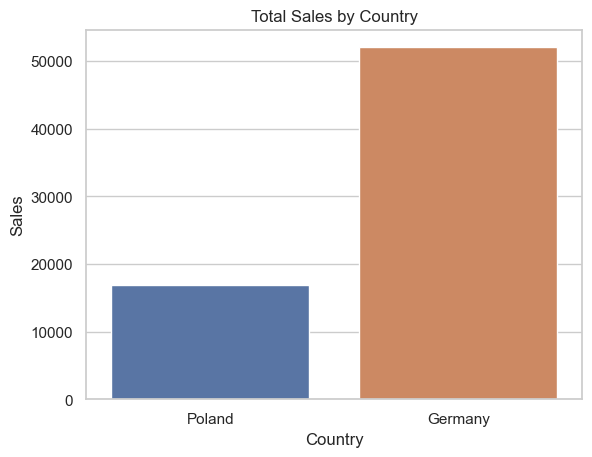

In [25]:
sns.barplot(data=pharma, x='Country', y='Sales', ci=None)
plt.title('Total Sales by Country')

In [24]:
#by cities
city_sales = pharma.groupby('City').Sales.sum().sort_values(ascending=False).head(15)
city_sales

City
Butzbach          9.356178e+07
Baesweiler        6.489050e+07
Cuxhaven          5.600668e+07
Friedberg         5.218363e+07
Altenburg         5.088532e+07
Emsdetten         4.593901e+07
Bottrop           4.445462e+07
Freising          4.377938e+07
Trier             4.349563e+07
Castrop-Rauxel    4.206666e+07
Limburg           4.151422e+07
Berlin            4.079679e+07
Wedel             4.046475e+07
Ditzingen         4.035582e+07
Dachau            3.793555e+07
Name: Sales, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Butzbach'),
  Text(1, 0, 'Baesweiler'),
  Text(2, 0, 'Cuxhaven'),
  Text(3, 0, 'Friedberg'),
  Text(4, 0, 'Altenburg'),
  Text(5, 0, 'Emsdetten'),
  Text(6, 0, 'Bottrop'),
  Text(7, 0, 'Freising'),
  Text(8, 0, 'Trier'),
  Text(9, 0, 'Castrop-Rauxel'),
  Text(10, 0, 'Limburg'),
  Text(11, 0, 'Berlin'),
  Text(12, 0, 'Wedel'),
  Text(13, 0, 'Ditzingen'),
  Text(14, 0, 'Dachau')])

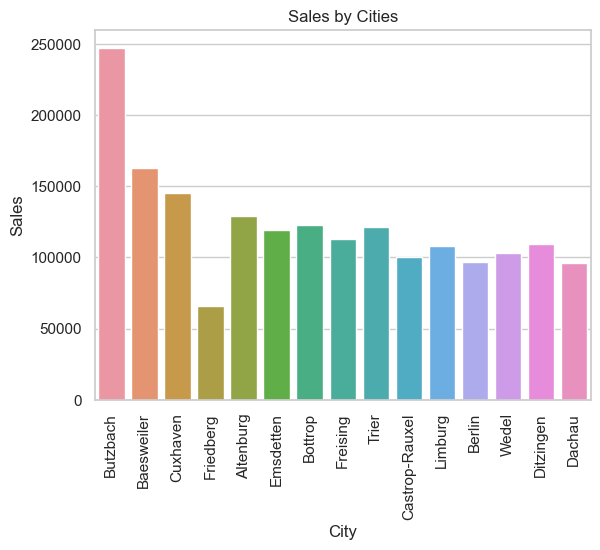

In [43]:
sns.barplot(data=pharma, x='City', y='Sales', order=city_sales.index, ci=None)
plt.title('Sales by Cities')
plt.xticks(rotation=90)

- The distribution of sales by countries shows Germany has the highest percentage of sales over the period considered
- The top performing city is the Butzbach among the top 15 cities across the two countries

#### 2. What are the characteristics of different customer segments, and how do they contribute to sales?

In [46]:
seg = pharma.groupby('Product_class').Sales.sum().sort_values(ascending=False)
seg

Product_class
Analgesics          2.371515e+09
Antiseptics         2.237525e+09
Mood Stabilizers    2.058910e+09
Antipiretics        1.883306e+09
Antibiotics         1.750277e+09
Antimalarial        1.497455e+09
Name: Sales, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mood Stabilizers'),
  Text(1, 0, 'Antibiotics'),
  Text(2, 0, 'Analgesics'),
  Text(3, 0, 'Antiseptics'),
  Text(4, 0, 'Antipiretics'),
  Text(5, 0, 'Antimalarial')])

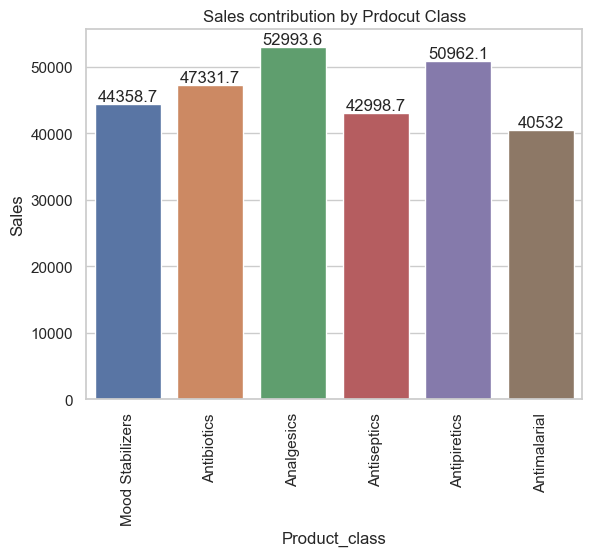

In [60]:
ax = sns.barplot(data=pharma, x='Product_class', y='Sales', ci=None)
ax.bar_label(ax.containers[0])
plt.title('Sales contribution by Prdocut Class')
plt.xticks(rotation=90)

- Different customer segment such as product class have contributed to sales greatly.
- Analgesics is the top product class contributing to sales (52993.6), followed by Antipiretics (50962.1)
- Antibiotics is rated 3rd with overall sales contribution of 47331.7
- Mood stabilizers (44358.7), Antiseptics (42998.7), and Antimalaria (40532) respectively

#### 3. Which sales channels are most effective in reaching customers?

In [63]:
#channel effectiveness analysis
effec_ch = pharma.groupby('Channel').Sales.sum().sort_values(ascending=False)
effec_ch

Channel
Pharmacy    6.218312e+09
Hospital    5.580676e+09
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sales channels')

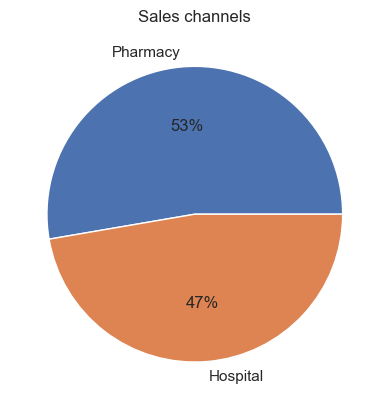

In [65]:
channel = [6.218312e+09, 5.580676e+09]
keys = ['Pharmacy', 'Hospital']

plt.pie(channel, labels=keys, autopct='%0.f%%')
plt.title('Sales channels')

- The most effective channel in reaching out to potential customers or clients is through Pharmacists
- Pharmacy account for 53% overall in reaching out to customers
- Hospitals account for 47% in reaching customers.

In [68]:
# sub-channels
sub_ch = pharma.groupby('Sub_channel').Sales.sum().sort_values(ascending=False)
sub_ch

Sub_channel
Retail         3.343097e+09
Government     3.058240e+09
Institution    2.875215e+09
Private        2.522435e+09
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sales Sub-Channels')

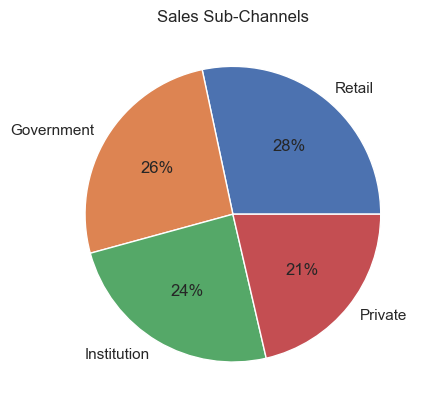

In [69]:
sub_ch_data = [ 3.343097e+09, 3.058240e+09,  2.875215e+09,  2.522435e+09]
keys = ['Retail', 'Government', 'Institution', 'Private']

plt.pie(sub_ch_data, labels=keys, autopct='%.0f%%')
plt.title('Sales Sub-Channels')

- For the sales sub channels;
- Retailers have 28% chances of reaching to customers
- Government account for 26%
- Institutions have 24% chances of reaching customers
- Private have 21% chance of reaching customers in terms of distribution of drugs and other essential products

#### 4. What are the top-selling products, and how does their performance vary?

In [79]:
top_10_prd = pharma.groupby('Product_name').Sales.sum().sort_values(ascending=False).head(10)
top_10_prd

Product_name
Ionclotide               169083391.0
Tetratanyl               126091294.0
Sumanazole               113861431.0
Betanem                  107073473.0
Docstryl Rivacin         103811886.0
Travoloride              101167660.0
Propratecan              100878712.0
Ketastadil                97313783.0
Nevanide Actozide         96643552.0
Cephozumab Synmethate     95320320.0
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Top 10 product Contribution to sales')

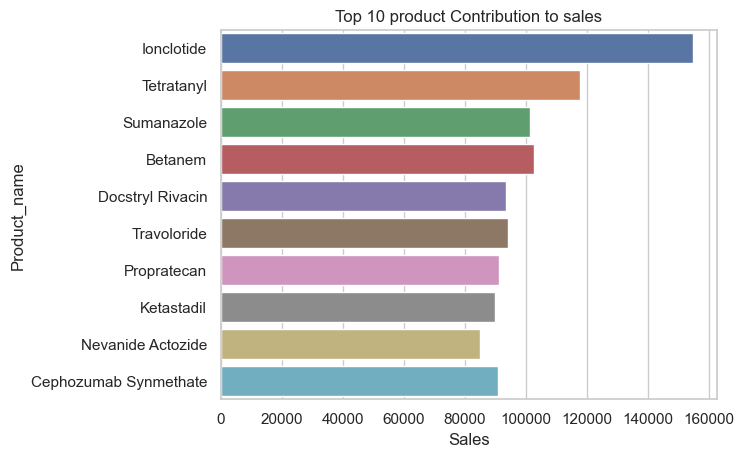

In [80]:
sns.barplot(data=pharma, x='Sales', y='Product_name', order=top_10_prd.index, ci=None)
plt.title('Top 10 product Contribution to sales')

- For the top performing product names;
    - Lonclotide top the list as the most sought after product followed by Tetratanyl
    - Others on the top 5 list include Sumanazole, Betanem, Docstryl Rivacin and Travoloride, etc.
    - Overall, these products have impacted positively on the overall sales

#### 5. How do individual sales representatives contribute to overall sales?

In [92]:
#sales rep analysis
sales_rep = pharma.groupby('Name_sales_rep').Quantity.agg(['max', 'min']).sort_values(by=['max', 'min'],ascending=False)
sales_rep.head(15)

,max,min
Name_sales_rep,,
Jimmy Grey,117600.0,-1920.0
Stella Given,92000.0,-2560.0
Steve Pepple,88200.0,-3190.0
Anne Wu,58800.0,-3500.0
Jessica Smith,58800.0,-7200.0
Daniel Gates,50000.0,-4500.0
Abigail Thompson,46000.0,-2000.0
Thompson Crawford,42721.0,-3350.0
Sheila Stones,40000.0,-7200.0


In [93]:
#Total sales by each sales rep
top_sales_rep = pharma.groupby('Name_sales_rep').Sales.agg(['max', 'min']).sort_values(by=['max', 'min'],ascending=False)
top_sales_rep.head(15)

,max,min
Name_sales_rep,,
Jimmy Grey,74205600.0,-1317120.0
Stella Given,47012000.0,-1574400.0
Anne Wu,30164400.0,-487053.0
Daniel Gates,25550000.0,-3168000.0
Abigail Thompson,24334000.0,-984000.0
Sheila Stones,18800000.0,-4161600.0
Morris Garcia,18144000.0,-691200.0
Steve Pepple,16846200.0,-933240.0
Erica Jones,16450000.0,-1451860.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

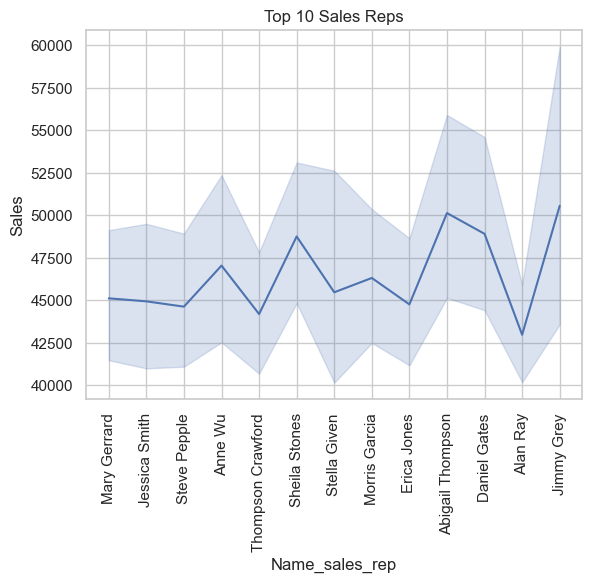

In [97]:
sns.lineplot(data=pharma, x='Name_sales_rep', y='Sales')
plt.title('Top 10 Sales Reps')
plt.xticks(rotation=90)

- Top 5 performing sales reps are Jimmy Grey, Stella Given, Anne Wu, Daniel Gates, and Abigail Thompson

#### 6. What are the seasonal sales trends, and how do they impact overall performance?

Text(0.5, 1.0, 'Sales Trends')

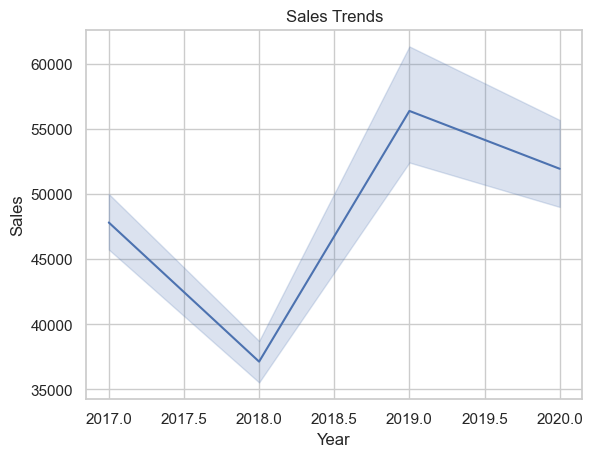

In [99]:
sns.lineplot(data=pharma, x='Year', y='Sales')
plt.title('Sales Trends')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

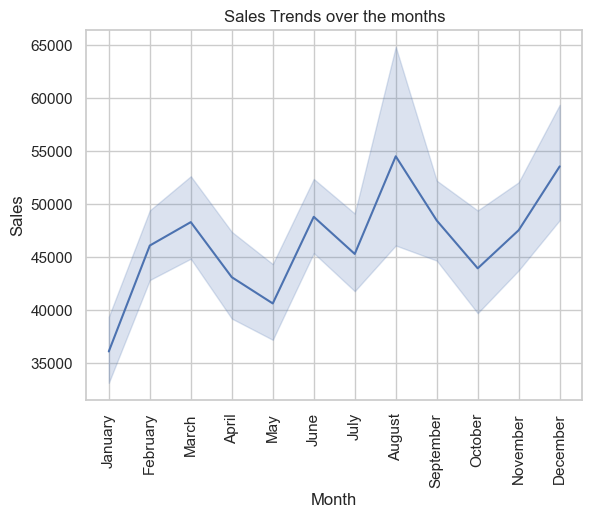

In [101]:
sns.lineplot(data=pharma, x='Month', y='Sales')
plt.title('Sales Trends over the months')
plt.xticks(rotation=90)

- They have been increase in sales in 2017 but sales drops in 2018.
- They have been a rise in sales after 2018 and an upward trend is maintained throughout the period under review
- They have been a consistent upward trend in the monthly distribution of sales over the months for period under review

#### 7. How do managers and sales teams contribute to overall sales performance?

In [103]:
mgr = pharma.groupby('Manager').Sales.sum().sort_values(ascending=False)
mgr

Manager
Britanny Bold      3.635341e+09
Alisha Cordwell    2.824970e+09
Tracy Banks        2.757702e+09
James Goodwill     2.580974e+09
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Managers Contributions to Sales Performance')

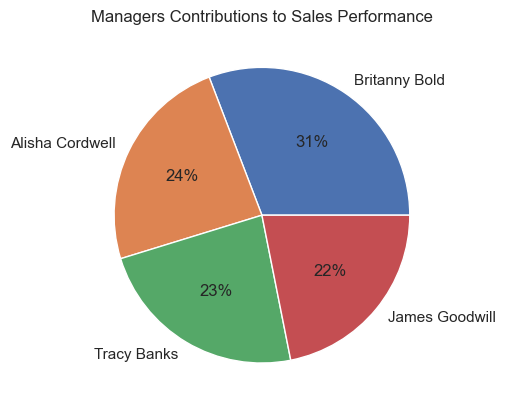

In [104]:
mgr_data = [ 3.635341e+09,  2.824970e+09, 2.757702e+09, 2.580974e+09]
keys = ['Britanny Bold', 'Alisha Cordwell', 'Tracy Banks', 'James Goodwill']
plt.pie(mgr_data, labels=keys, autopct='%.0f%%')
plt.title('Managers Contributions to Sales Performance')

- Britanny Bold wins the top performing manager with 31% contribution to sales performace
- There is competitive measure among Alisha Cordwell (24%), Tracy Banks (23%), and James Goodwill (22%) each with 
    just 1% differention in contributions to overall sales performance.

In [105]:
# sales team
sales_team = pharma.groupby('Sales_team').Sales.sum().sort_values(ascending=False)
sales_team

Sales_team
Delta      3.635341e+09
Charlie    2.824970e+09
Bravo      2.757702e+09
Alfa       2.580974e+09
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sales Team Contribution to Sales Performance')

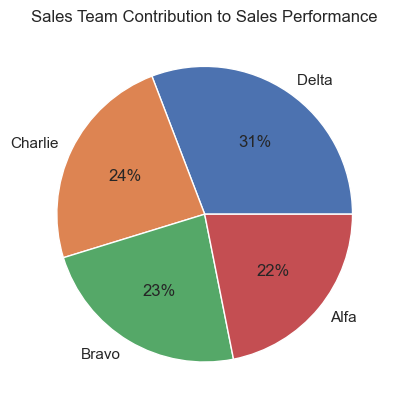

In [106]:
team = [3.635341e+09, 2.824970e+09, 2.757702e+09, 2.580974e+09]
keys = ['Delta ', 'Charlie', 'Bravo', 'Alfa']
plt.pie(team, labels=keys, autopct='%.0f%%')
plt.title('Sales Team Contribution to Sales Performance')

- Delta sales team lead the top performing team by contribution to sales with 31% which also corresponds to the top manager
- Charlie, Bravo, and Alfa each contributes 24%, 23% and 22% respectively

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

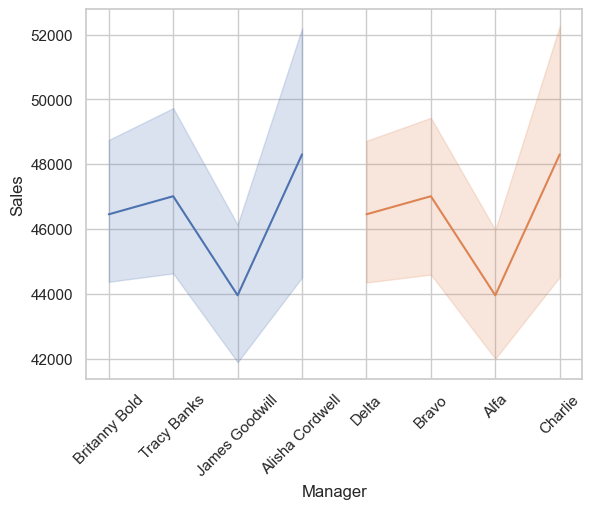

In [112]:
sns.lineplot(data=pharma, x='Manager', y='Sales')
sns.lineplot(data=pharma, x='Sales_team', y='Sales')
plt.xticks(rotation=45)

These analyses will help People's Pharmaceuticals to gain valuable insights into various aspects of the pharmacy business, including sales performance, customer behavior, channel effectiveness, and product popularity.